In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('car_price_prediction.csv')

In [ ]:
df.shape

(19237, 18)

In [ ]:
# df.duplicated().sum()
df.drop_duplicates(subset=['ID'],inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [ ]:
df['Mileage']=df['Mileage'].str.replace('km','').astype(int)



In [ ]:
df['Leather interior']=df['Leather interior'].map({'Yes':1,'No':0}).astype(float)

In [ ]:

df['Levy']=df['Levy'].replace('-','0').astype(int)

In [ ]:
df=df.drop('ID',axis=1)

In [ ]:
new_df=df

In [ ]:
from types import LambdaType
new_df['Turbo']=new_df['Engine volume'].apply( lambda x:1 if 'Turbo' in x else 0)
new_df['Engine volume']=new_df['Engine volume'].str.replace('Turbo','').astype(float)


In [ ]:
!pip install category_encoders
!pip install scikit-learn==1.2.2 category_encoders==2.5.1.post0



In [ ]:
from category_encoders import LeaveOneOutEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
colums=['Fuel type','Gear box type','Drive wheels','Doors','Color']
algo=LeaveOneOutEncoder(cols=colums)
algo.fit(new_df[colums],new_df['Price'])
new_df[colums]=algo.transform(new_df[colums])

In [ ]:
new_df['Wheel']=new_df['Wheel'].map({'Left wheel':1,'Right-hand drive':0}).astype(float)

In [ ]:
new_df.head(20)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,1.0,10845.476688,3.5,186005,6.0,16004.732495,19580.303351,17192.917924,1.0,15122.033253,12,0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,0.0,17391.153459,3.0,192000,6.0,26313.582708,19580.303351,17192.917924,1.0,18915.184466,8,0
2,8467,0,HONDA,FIT,2006,Hatchback,0.0,17391.153459,1.3,200000,4.0,14770.497954,18503.025443,17192.917924,0.0,18915.184466,2,0
3,3607,862,FORD,Escape,2011,Jeep,1.0,10845.476688,2.5,168966,4.0,16004.732495,19580.303351,17192.917924,1.0,18141.962786,0,0
4,11726,446,HONDA,FIT,2014,Hatchback,1.0,17391.153459,1.3,91901,4.0,16004.732495,18503.025443,17192.917924,1.0,15122.033253,4,0
5,39493,891,HYUNDAI,Santa FE,2016,Jeep,1.0,30684.792802,2.0,160931,4.0,16004.732495,18503.025443,17192.917924,1.0,18141.962786,4,0
6,1803,761,TOYOTA,Prius,2010,Hatchback,1.0,10845.476688,1.8,258909,4.0,16004.732495,18503.025443,17192.917924,1.0,18141.962786,12,0
7,549,751,HYUNDAI,Sonata,2013,Sedan,1.0,17391.153459,2.4,216118,4.0,16004.732495,18503.025443,17192.917924,1.0,19242.446436,12,0
8,1098,394,TOYOTA,Camry,2014,Sedan,1.0,10845.476688,2.5,398069,4.0,16004.732495,18503.025443,17192.917924,1.0,18915.184466,12,0
9,26657,0,LEXUS,RX 350,2007,Jeep,1.0,17391.153459,3.5,128500,6.0,16004.732495,19580.303351,17192.917924,1.0,15122.033253,12,0


In [ ]:
(new_df.isnull()  |(new_df=="-")).sum()

,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0
Mileage,0


In [ ]:
new_df.describe()

,Price,Levy,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
count,1.892400e+04,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000
mean,1.858744e+04,632.886493,2010.914236,0.725587,18587.340279,2.306251,1.555373e+06,4.580216,18587.435267,18587.435267,18587.435267,0.923219,18587.435267,6.568379,0.099979
std,1.921356e+05,568.273736,5.665749,0.446230,6855.512008,0.877591,4.880221e+07,1.200223,4480.696044,635.632248,6634.941425,0.266250,4812.915051,4.322323,0.299980
min,1.000000e+00,0.000000,1939.000000,0.000000,8186.859275,0.000000,0.000000e+00,1.000000,14770.497954,17317.917257,17192.917924,0.000000,8837.384615,0.000000,0.000000
25%,5.331000e+03,0.000000,2009.000000,0.000000,13320.505085,1.800000,7.019575e+04,4.000000,16004.732495,18503.025443,17192.917924,1.000000,15122.033253,4.000000,0.000000
50%,1.317200e+04,642.000000,2012.000000,1.000000,17391.153459,2.000000,1.264000e+05,4.000000,16004.732495,18503.025443,17192.917924,1.000000,18141.962786,6.000000,0.000000
75%,2.206300e+04,917.000000,2015.000000,1.000000,17391.153459,2.500000,1.891198e+05,4.000000,25865.434924,18503.025443,17192.917924,1.000000,18915.184466,12.000000,0.000000
max,2.630750e+07,11714.000000,2020.000000,1.000000,30684.792802,20.000000,2.147484e+09,16.000000,26313.582708,19580.303351,50793.735677,1.000000,34030.468023,16.000000,1.000000


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  float64
 7   Fuel type         18924 non-null  float64
 8   Engine volume     18924 non-null  float64
 9   Mileage           18924 non-null  int64  
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  float64
 12  Drive wheels      18924 non-null  float64
 13  Doors             18924 non-null  float64
 14  Wheel             18924 non-null  float64
 15  Color             18924 non-null  float64
 16  Airbags           18924 non-null  int64  
 17

In [ ]:
new_df.duplicated().sum()

3199

In [ ]:
df1=new_df.drop(['Manufacturer','Model','Category'],axis=1)
df1.corr()

,Price,Levy,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
Price,1.000000,-0.003558,0.012689,0.000551,0.035681,0.008888,-0.001763,0.007435,0.023320,0.003308,0.034533,0.014558,0.025050,-0.012709,0.016973
Levy,-0.003558,1.000000,0.362827,0.331553,0.134226,0.378117,-0.021203,0.251632,-0.300884,0.159031,-0.111827,0.144092,-0.002076,0.125015,-0.168714
Prod. year,0.012689,0.362827,1.000000,0.388608,0.025589,-0.032427,-0.064058,-0.099443,-0.364205,0.136321,-0.211052,0.228141,0.015061,0.235160,-0.077724
Leather interior,0.000551,0.331553,0.388608,1.000000,0.121716,0.271749,-0.034682,0.199716,-0.281305,0.086841,-0.118517,0.346620,-0.000870,0.161889,-0.104543
Fuel type,0.035681,0.134226,0.025589,0.121716,1.000000,0.076501,-0.017464,0.027204,0.047736,-0.045897,0.054306,0.125316,0.012327,-0.128530,0.223408
Engine volume,0.008888,0.378117,-0.032427,0.271749,0.076501,1.000000,-0.006292,0.777228,0.053466,0.201768,0.021629,0.185995,-0.002456,0.221991,-0.017630
Mileage,-0.001763,-0.021203,-0.064058,-0.034682,-0.017464,-0.006292,1.000000,-0.001720,0.035563,-0.009250,0.005850,-0.016441,0.007514,-0.009174,-0.001490
Cylinders,0.007435,0.251632,-0.099443,0.199716,0.027204,0.777228,-0.001720,1.000000,0.102361,0.185182,0.043163,0.091955,0.009402,0.174112,0.035407
Gear box type,0.023320,-0.300884,-0.364205,-0.281305,0.047736,0.053466,0.035563,0.102361,1.000000,-0.159747,0.219477,0.018420,0.033971,0.052041,0.395321
Drive wheels,0.003308,0.159031,0.136321,0.086841,-0.045897,0.201768,-0.009250,0.185182,-0.159747,1.000000,-0.157108,-0.009331,-0.011434,0.016613,-0.082077


In [ ]:
df['Wheel'].value_counts()

,count
Wheel,
1.0,17471
0.0,1453


In [ ]:
df['Doors'].value_counts()


,count
Doors,
17192.917924,18032
50793.735677,768
21905.967742,124


In [ ]:
df['Color'].value_counts()


,count
Color,
18915.184466,4944
18141.962786,4407
15122.033253,3729
19242.446436,2343
34030.468023,1376
13645.670418,622
9477.894081,321
13026.444444,252
19873.551351,185


In [ ]:
df['Engine volume'].value_counts()

,count
Engine volume,
2.0,4259
2.5,2337
1.8,1918
1.6,1562
1.5,1354
...,...
3.1,1
7.3,1
0.5,1


## categorical plot

<Axes: xlabel='Doors', ylabel='count'>

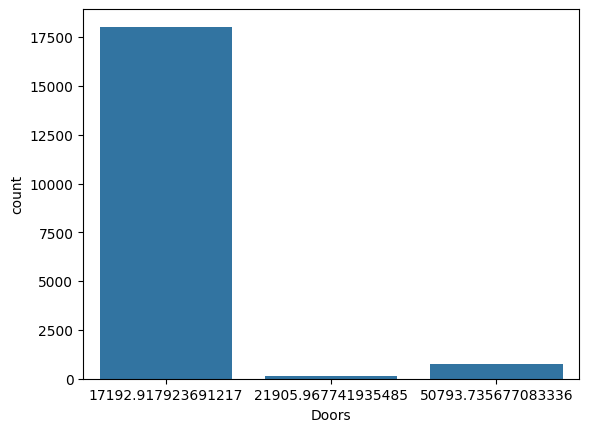

In [ ]:
sns.countplot(data=new_df,x='Doors')

<Axes: ylabel='count'>

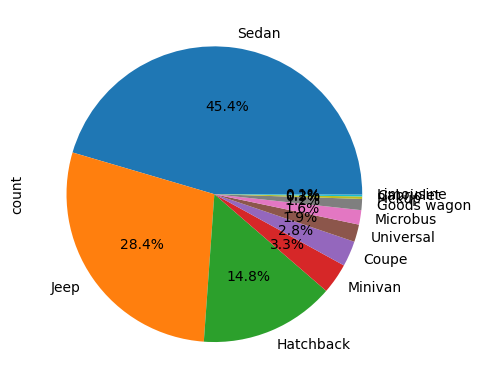

In [ ]:
new_df['Category'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='count'>

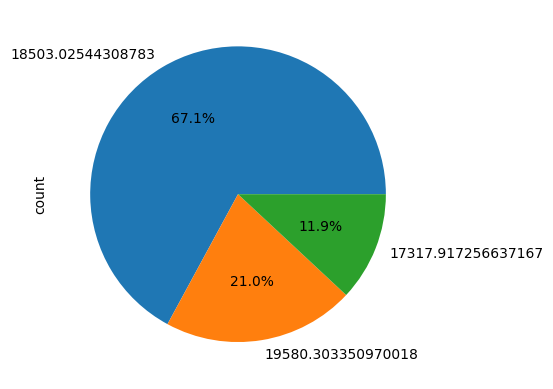

In [ ]:
new_df['Drive wheels'].value_counts().plot(kind='pie',autopct='%1.1f%%')


<Axes: xlabel='Fuel type', ylabel='count'>

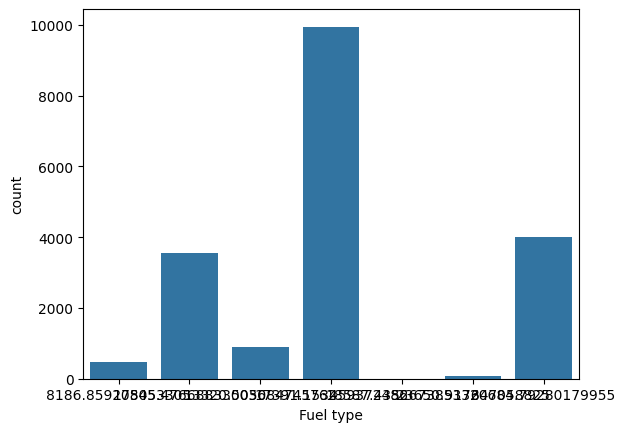

In [ ]:
sns.countplot(data=new_df,x='Fuel type')

<Axes: ylabel='count'>

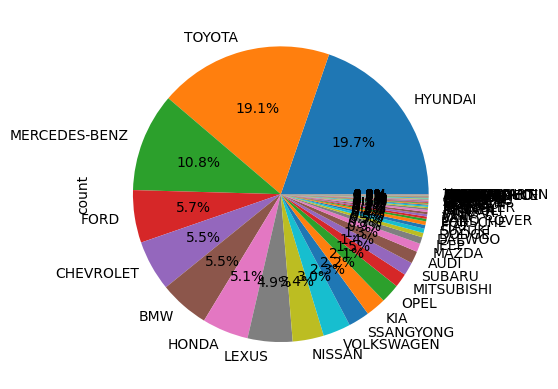

In [ ]:
new_df['Manufacturer'].value_counts().plot(kind='pie',autopct='%1.1f%%')


## numerical plot

In [ ]:
plt.hist(new_df['Price'],bins=50)

In [ ]:
# sns.distplot(df['Price'],hist=False)
sns.distplot(new_df['Prod. year'])


In [ ]:
sns.boxplot(new_df['Prod. year'])

## Bivariate analysis

In [ ]:
sns.scatterplot(data=new_df,x='Price',y='Fuel type',hue='Leather interior',size='Prod. year')

In [ ]:
sns.violinplot(x='Model', y='Price', data=new_df)

In [ ]:
sns.barplot(data=new_df,x='Prod. year',y='Price')

In [ ]:
sns.boxplot(data=new_df,x='Gear box type',y='Price')

In [ ]:
sns.pairplot(new_df,hue='Price')

<Axes: >

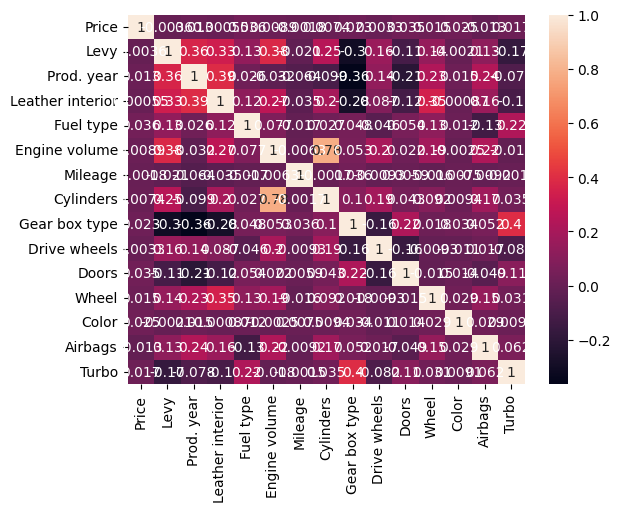

In [ ]:
format=df1.corr()
sns.heatmap(format,annot=True)

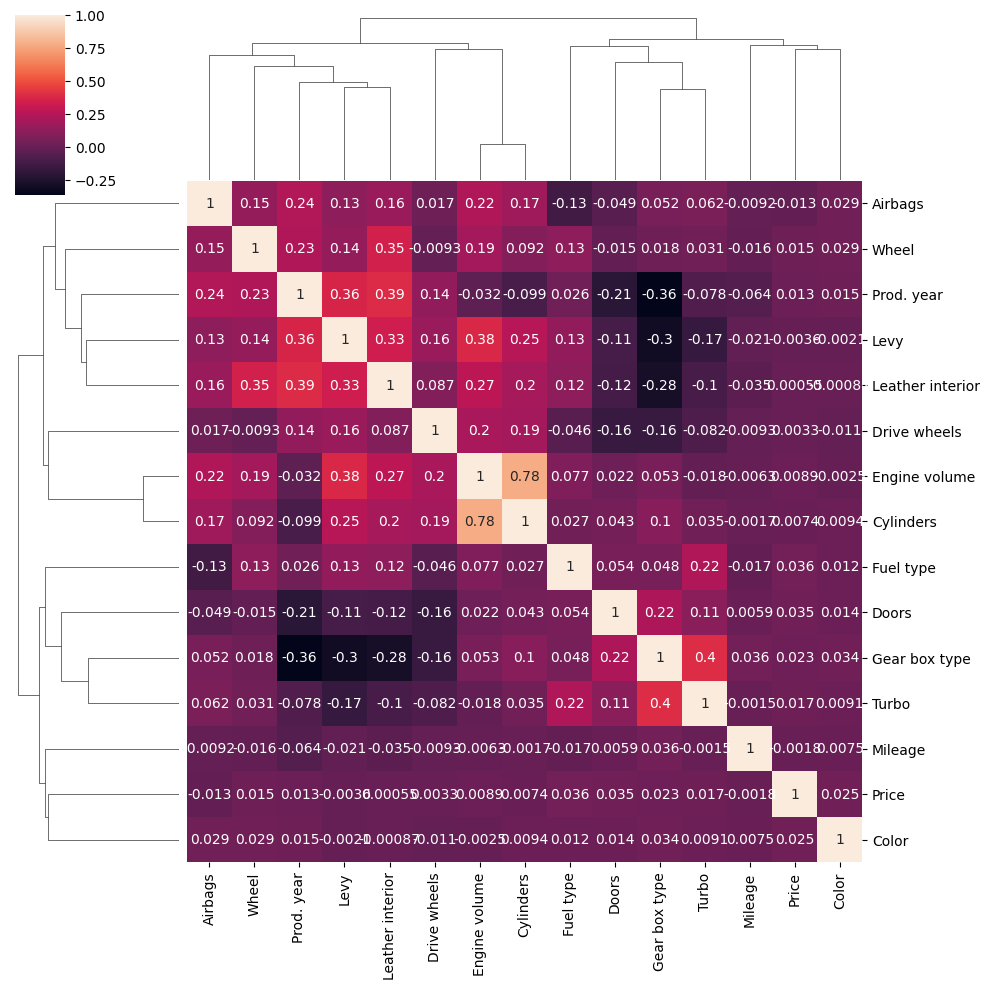

In [ ]:
sns.clustermap(format,annot=True)

## as chart plot analysis of dataset Leather interior is not more relative with price SO we remove this

In [ ]:
new_df=new_df.drop(['Leather interior'] ,axis=1)

In [ ]:
df_setect_out=df[['Levy','Engine volume','Mileage','Cylinders','Airbags']]
df_setect_out

,Levy,Engine volume,Mileage,Cylinders,Airbags
0,1399,3.5,186005,6.0,12
1,1018,3.0,192000,6.0,8
2,0,1.3,200000,4.0,2
3,862,2.5,168966,4.0,0
4,446,1.3,91901,4.0,4
...,...,...,...,...,...
19232,0,2.0,300000,4.0,5
19233,831,2.4,161600,4.0,8
19234,836,2.0,116365,4.0,4
19235,1288,2.0,51258,4.0,4


In [ ]:
outlier_cols = []

for column in df_setect_out.columns:

    Q1 = df_setect_out[column].quantile(0.25)
    Q3 = df_setect_out[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers based on the IQR
    outliers = (df_setect_out[column] < Q1 - 1.5 * IQR) | (df_setect_out[column] > Q3 + 1.5 * IQR)
    if any(outliers):
        outlier_cols.append(column)

print("Columns with outliers:", outlier_cols)

Columns with outliers: ['Levy', 'Engine volume', 'Mileage', 'Cylinders']


In [ ]:
data = {
    'Levy': [100, 150, 200, 250, 300, 5000],
    'Engine volume': [1.5, 2.0, 2.5, 3.0, 4.0, 10.0],
    'Mileage': [5000, 10000, 15000, 20000, 25000, 500000],
    'Cylinders': [4, 6, 8, 12, 16, 32]
}

df_select_out = pd.DataFrame(data)

# Function to replace outliers in a column with a specific value
def replace_outliers(column, replace_value):
   Q1 = column.quantile(0.25)
   Q3 = column.quantile(0.75)
   IQR = Q3 - Q1

   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR

   column.loc[(column < lower_bound) | (column > upper_bound)] = replace_value

for col in ['Levy', 'Engine volume', 'Mileage', 'Cylinders']:
    replace_outliers(df_select_out[col], replace_value=df_select_out[col].median())

<ipython-input-47-b9b7969d4899>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[(column < lower_bound) | (column > upper_bound)] = replace_value
<ipython-input-47-b9b7969d4899>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[(column < lower_bound) | (column > upper_bound)] = replace_value
<ipython-input-47-b9b7969d4899>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[(column < lower_bound) | (colu

In [ ]:
new_df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,10845.476688,3.5,186005,6.0,16004.732495,19580.303351,17192.917924,1.0,15122.033253,12,0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,17391.153459,3.0,192000,6.0,26313.582708,19580.303351,17192.917924,1.0,18915.184466,8,0
2,8467,0,HONDA,FIT,2006,Hatchback,17391.153459,1.3,200000,4.0,14770.497954,18503.025443,17192.917924,0.0,18915.184466,2,0
3,3607,862,FORD,Escape,2011,Jeep,10845.476688,2.5,168966,4.0,16004.732495,19580.303351,17192.917924,1.0,18141.962786,0,0
4,11726,446,HONDA,FIT,2014,Hatchback,17391.153459,1.3,91901,4.0,16004.732495,18503.025443,17192.917924,1.0,15122.033253,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,8186.859275,2.0,300000,4.0,25865.434924,17317.917257,50793.735677,1.0,15122.033253,5,1
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,17391.153459,2.4,161600,4.0,26313.582708,18503.025443,17192.917924,1.0,13645.670418,8,0
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,30684.792802,2.0,116365,4.0,16004.732495,18503.025443,17192.917924,1.0,19242.446436,4,0
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,30684.792802,2.0,51258,4.0,16004.732495,18503.025443,17192.917924,1.0,18915.184466,4,0


In [ ]:
num_data=new_df.select_dtypes(include=['int64','float64'])

In [ ]:
cat_data=new_df.select_dtypes(include=['object'])

In [ ]:
num_df=num_data
cat_df=cat_data
y=new_df['Price']

In [ ]:
num_df.drop(['Price'],axis=1,inplace=True)

In [ ]:
cat_df.drop(['Model'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# scaler=StandardScaler()
# num_df=scaler.fit_transform(num_df)

In [ ]:
num_cols = num_df.columns
cat_cols = cat_df.columns


In [ ]:
num_pipline=Pipeline(steps=[('scaler',StandardScaler())])

In [ ]:
full_pipline=ColumnTransformer([('num',num_pipline,num_cols),
                             ('cat',OneHotEncoder(),cat_cols)])

In [ ]:
new_data=full_pipline.fit_transform(new_df)

In [ ]:
new_data.info

<18924x89 sparse matrix of type '<class 'numpy.float64'>'
	with 283860 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(new_data,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
# model=LinearRegression()
# model=Ridge()
# model=Lasso()

model=DecisionTreeRegressor(random_state=123)


model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
rmse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(rmse)
print(rmse)

12593.171762351025


In [ ]:
score=r2_score(y_test,y_pred)
print(score)

0.5419553591977528


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,new_data,y,scoring="neg_mean_squared_error",cv=10)
mer_score=np.sqrt(-score)

In [ ]:
mer_score

array([132321.57292888,  10752.66667753, 295296.14942614, 110247.01901534,
        43577.05171263,  37371.57866639,  61230.88446584,  80609.30262815,
       604740.09654561,  37109.66989833])